In [1]:
from pylab import *
%matplotlib inline
import pandas as pd

# $\alpha$ helix

In [2]:
path="/run/media/k1762355/Untitled/for-exam/research-project-assignment/umbrella-sampling-data/helix1_pulling_umbrella/"
#path="../for-exam/research-project-assignment/umbrella-sampling-data/hairpin1_pulling_umbrella/"

### PMF

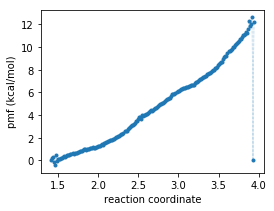

In [6]:
p=pd.read_table(path+"bootstrap/bootstrap_5/pmf.xvg",header=11,names=["z","E"])
figure(figsize=(4,3))
plot(p.z,p.E,":",lw=0.5,marker=".")
xlabel("reaction coordinate")
ylabel("pmf (kcal/mol)")

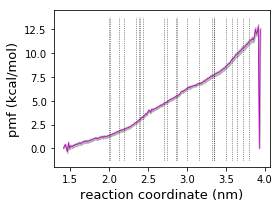

In [8]:
p=pd.read_table(path+"/umbrella-location.dat",names=["R"],header=None)
R=array(-p.R)
p=pd.read_table(path+"/bootstrap/bootstrap_50/bsResult.xvg",header=12,names=["z","E","dE"])
figure(figsize=(4,3))
plot(p.z,p.E,"m",lw=0.8)
fill_between(p.z,p.E-p.dE,p.E+p.dE,color="gray",alpha=0.5)
xlabel("reaction coordinate (nm)",fontsize=13)
ylabel("pmf (kcal/mol)",fontsize=13)
ymin,ymax=gca().get_ylim()
vlines(R,ymin,ymax,linestyle=":",lw=0.7,alpha=0.8)
tight_layout()

#savefig("pmf.pdf")

### comparing bootstraps

In [11]:
bootstrap=[5,20,50,70,100]
sigma=[]
for bstr in bootstrap:
    p=pd.read_table(path+"/bootstrap/bootstrap_"+str(bstr)+"/bsResult.xvg",header=12,names=["z","E","dE"])
    sigma+=[p.dE]
sigma=transpose(sigma)

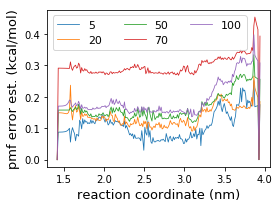

In [27]:
figure(figsize=(4,3))
plot(p.z,sigma,"-",lw=0.8)
legend(bootstrap,ncol=3,fontsize=11)
xlabel("reaction coordinate (nm)",fontsize=13)
ylabel("pmf error est. (kcal/mol)",fontsize=13)
tight_layout()
savefig("bootstrap.pdf")

In [51]:
p=pd.read_table(path+"bootstrap_"+str(bstr)+"/bsProfs.xvg",header=11,names=["z","E"])
shape(p)

(14070, 2)

### histograms 
follow Matlab code instead

In [16]:
data=[]
df=pd.read_csv(path+"/bootstrap/bootstrap_"+str(50)+'/all_hist.dat',sep=' ',header=None,skip_blank_lines=False)
events=np.split(df, df[df.isnull().all(1)].index)
events=events[:-1]

for el in events:# it stores the first empty line, so we remove it
    data+=[el.dropna()]
events=data
bins=[events[i][0] for i in arange(len(events))]
h=array([array(events[i][1])  for i in arange(len(events))])/sum(events[0][1])# divide to obtain the frequency 

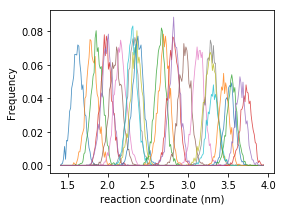

In [17]:

figure(figsize=(4,3))
for i in arange(len(events)):
    plot(bins[i],h[i],lw=0.8,alpha=0.8)
xlabel("reaction coordinate (nm)")
ylabel("Frequency")

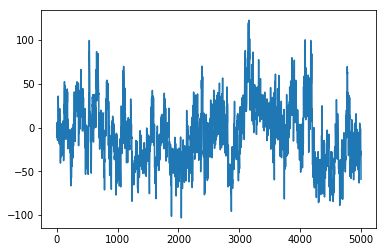

In [12]:
p=pd.read_table(path+"/1-struct/pullf-umbrella.xvg",header=11,names=["t","F"])
plot(p.t,p.F)

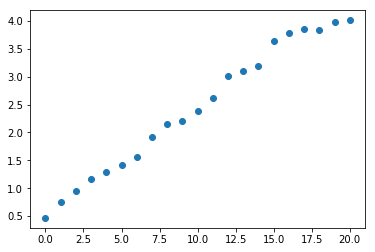

In [16]:
p=pd.read_table(path+"/umbrella-location.dat",names=["R"],header=None)
R=array(p.R)
plot(R,"o")

### H bond
bond distance

In [2]:
data=[]
df=pd.read_csv('hbond.dat',sep=' ',header=None,skip_blank_lines=False,names=["n","r"])
events=np.split(df, df[df.isnull().all(1)].index)
events=events[:-1]

for el in events:# it stores the first empty line, so we remove it
    data+=[el.dropna()]

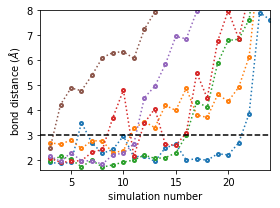

In [8]:

figure(figsize=(4,3))
for d in data:
    plot(d.n+3,d.r,":",marker=".",ms=6,mfc="white",mew=2)
axhline(3,ls="--",color="k")
ylim(1.6,8)
xlim(2,24)
xlabel("simulation number")
ylabel("bond distance ($\AA$)")
#legend(arange(1,7),numpoints=1,ncol=1,loc="lower right")
tight_layout()
savefig("Hbond.pdf")

In [117]:
data=[]
df=pd.read_csv(path+'/TRP.dat',sep=' ',header=None,skip_blank_lines=False,names=["n","r"])
events=np.split(df, df[df.isnull().all(1)].index)
events=events[:-1]

for el in events:# it stores the first empty line, so we remove it
    data+=[el.dropna()]

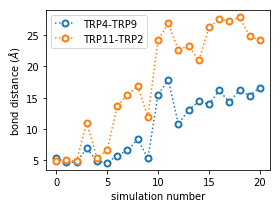

In [124]:
figure(figsize=(4,3))
for d in data:
    plot(d.n,d.r,":",marker="o",ms=6,mfc="white",mew=2)
xlabel("simulation number")
ylabel("bond distance ($\AA$)")
tight_layout()
legend(["TRP4-TRP9", "TRP11-TRP2"],numpoints=1)
savefig("hairpin-TRP.pdf")

In [112]:
df.dropna()

,0,1
0,0.0,2.203841
1,1.0,4.778401
2,2.0,5.604624
3,3.0,7.417555
4,4.0,9.685117
5,5.0,11.674958
6,6.0,13.745669
7,7.0,15.967454
8,8.0,17.993917
9,9.0,19.956774


In [102]:
pd.read_csv?